In [ ]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep
import json

# if True, the analysis starts from the current event-keys used in production
# else, it starts an analysis based on the keys in "event_keys" folder
KEEP_PRODUCTION_ANALYSIS = True

if not KEEP_PRODUCTION_ANALYSIS:
    analysis_name = '2023-2024-analysis-10-250-higherfrequency'
    list_minutes = '1440'
    event_keys_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/event_keys/event_keys.json"
    event_keys = create_event_keys(event_keys_path, list_minutes, analysis_name)
else:
    riskmanagement_json_prod_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/riskmanagement.json"
    with open(riskmanagement_json_prod_path, 'r') as file:
        # Retrieve shared memory for JSON data and "start_interval"
        riskmanagement_json_prod = json.load(file)
        event_keys = list(riskmanagement_json_prod.keys())

n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 10

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes, KEEP_PRODUCTION_ANALYSIS) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

In [2]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]

file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
start_analysis= datetime(2025,1,15)
early_validation = datetime(2026,1,1)
xth_percentile=99
filter_field='mean' #mean, std, max, min
output, complete_info = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile)


#output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

df.sort_values(by=['mean'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

Number of event_keys: 23
Daily frequency of events: 1


,mean,std,max,min,median_max,median_min,standings,n_coins,n_events,upper_bound,lower_bound,frequency/month
buy_vol_5m:0.25/vol_5m:50/timeframe:1440/lvl:250,2.66,3.44,9.43,-3.20,7.18,-1.54,172.69,11.0,13.0,6.10,-0.78,1.11
buy_vol_15m:0.25/vol_15m:20/timeframe:1440/lvl:250,1.12,3.24,7.25,-4.38,3.61,-1.30,174.64,13.0,14.0,4.36,-2.12,1.20
buy_vol_1m:0.15/vol_1m:100/timeframe:1440/lvl:250,0.94,3.45,7.24,-4.38,5.41,-2.96,172.24,18.0,21.0,4.39,-2.51,1.79
buy_vol_15m:0.25/vol_15m:8/timeframe:1440/lvl:150,0.81,3.46,6.53,-4.76,4.57,-3.08,98.26,23.0,34.0,4.27,-2.65,2.91
buy_vol_5m:0.25/vol_5m:10/timeframe:1440/lvl:50,0.67,2.00,4.64,-3.73,3.51,-2.91,27.58,19.0,24.0,2.67,-1.33,2.05
buy_vol_5m:0.25/vol_5m:20/timeframe:1440/lvl:150,0.32,3.57,6.30,-5.51,4.54,-3.25,102.28,28.0,39.0,3.89,-3.25,3.33
buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150,0.15,3.34,5.97,-5.39,4.11,-3.01,100.39,23.0,33.0,3.49,-3.19,2.82
buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150,-0.18,1.28,2.16,-2.84,2.20,-2.47,91.60,3.0,5.0,1.10,-1.46,0.43
buy_vol_1m:0.15/vol_1m:20/timeframe:1440/lvl:50,-0.31,2.73,4.78,-5.73,3.26,-5.34,29.97,17.0,34.0,2.42,-3.04,2.91
buy_vol_1m:0.85/vol_1m:100/timeframe:1440/lvl:250,-0.36,2.87,5.29,-6.15,4.61,-4.97,185.92,7.0,13.0,2.51,-3.23,1.11


In [ ]:
complete_info

In [2]:
# from Helpers import filter_complete_info_by_current_eventkeys
# complete_info = filter_complete_info_by_current_eventkeys(complete_info)


Filtered 6 event_keys


In [ ]:
from Helpers import create_rismanagement_from_complete_info
create_rismanagement_from_complete_info(complete_info)

In [ ]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

1/23 Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
Order Book Metadata is up to date
Timeseries is up to date
Starts updating Full Timeseries buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150


/Users/albertorainieri/Personal/analysis/Analysis2024/Helpers.py:1193: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(dt, lvl_bid[0], 'ro', color='red', markersize=1)


UnboundLocalError: local variable 'cumulative_level_without_jump' referenced before assignment

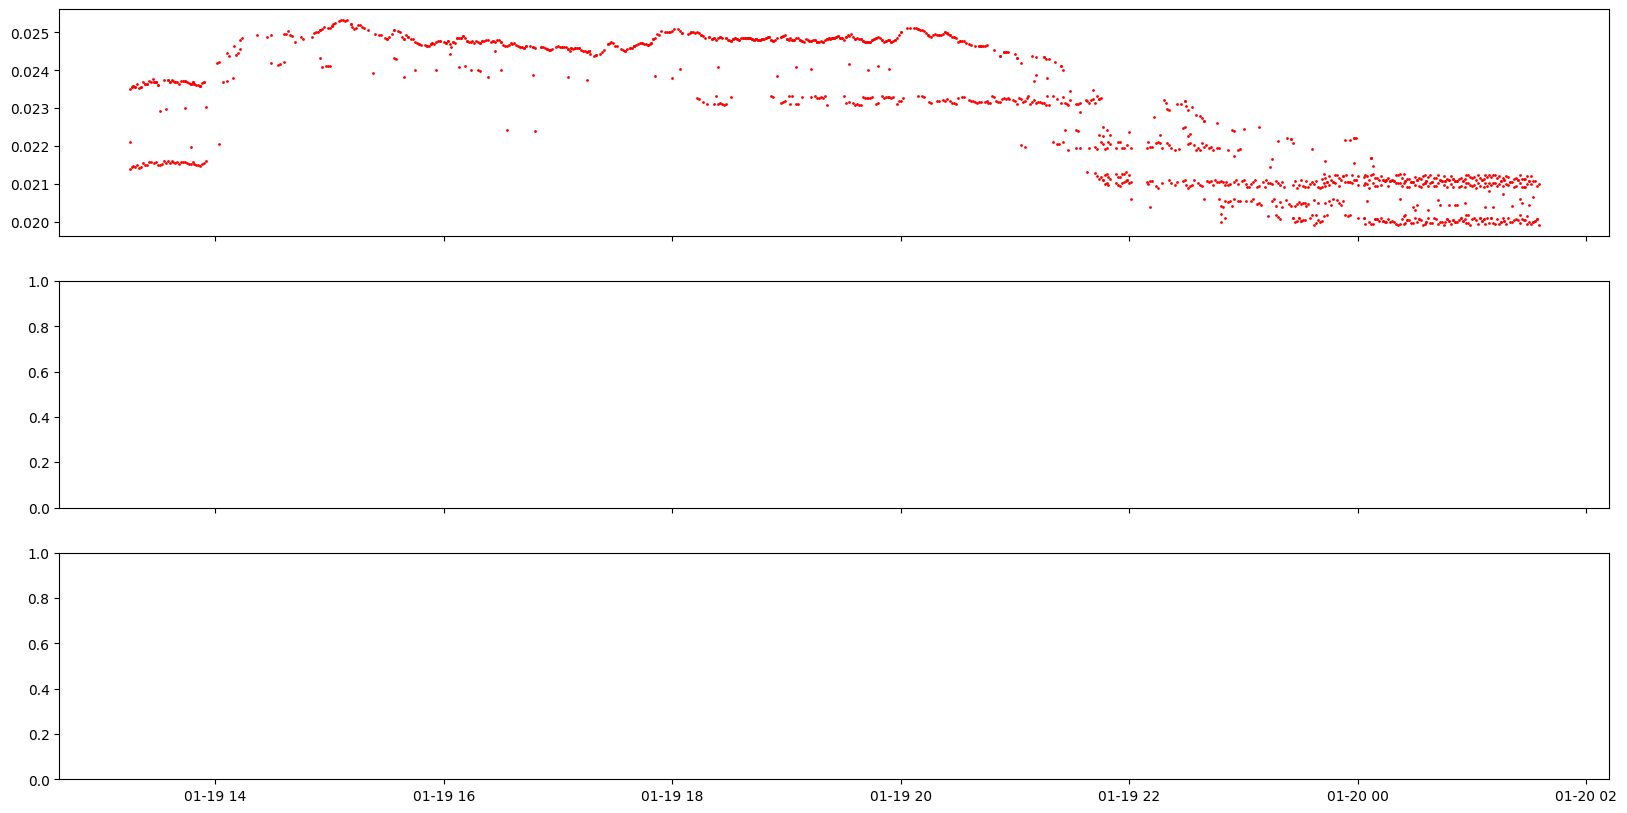

In [4]:
#key='buy_vol_5m:0.9/vol_5m:20/trades_5m:0.1/timeframe:1440'
from Helpers import get_timeseries
check_past=180 #minutes before event trigger
check_future=1440 #minutes after the end of event (usually after 1 days from event trigger)
jump=0.03 #jump from price levels in terms of cumulative volume order (from 0 to 1)
limit=0.1 #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
response = get_timeseries(complete_info, check_past, check_future, plot=True)

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/albertorainieri/Personal/analysis/Analysis2024/Helpers.py:1193: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(dt, lvl_bid[0], 'ro', color='red', markersize=1)
/Users/albertorainieri/Personal/analysis/Analysis2024/Helpers.py:1196: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(dt, lvl_ask[0], 'ro', color='green', markersize=1)


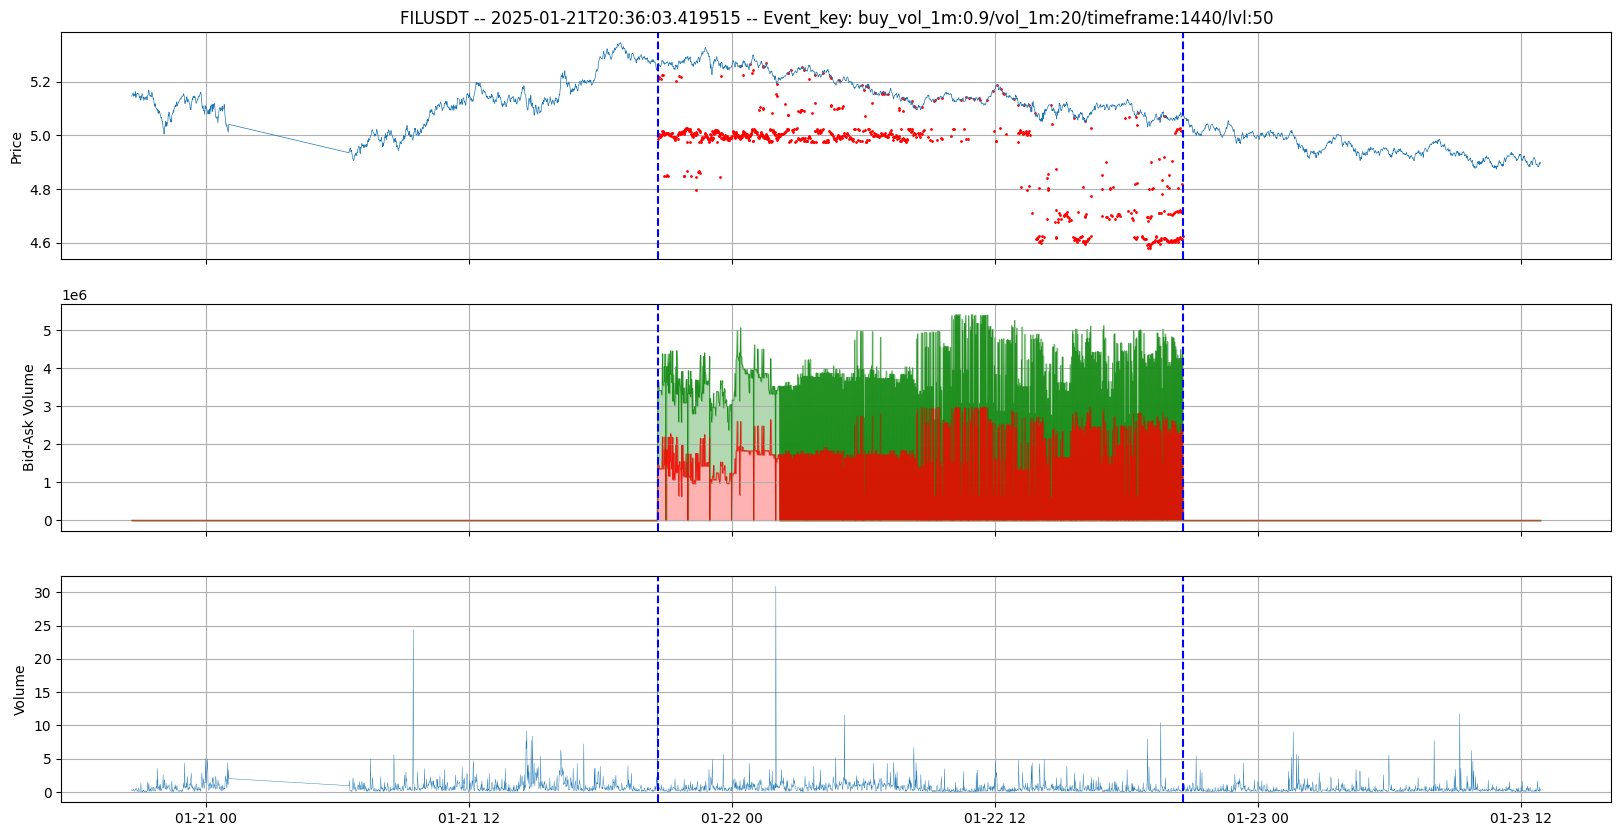

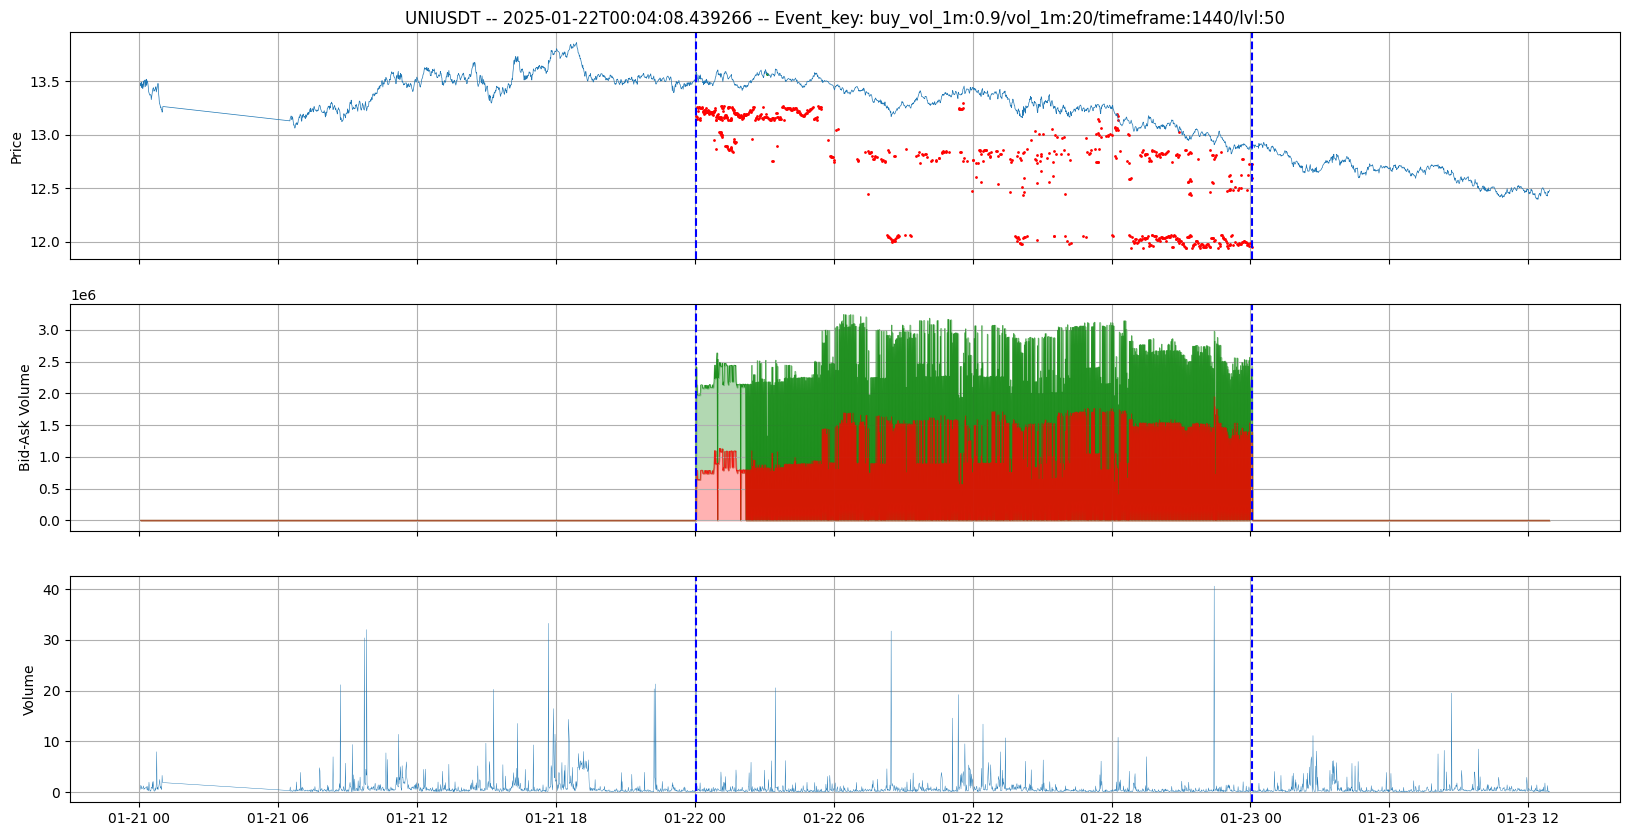

In [1]:
from Helpers import plot_timeseries
plot_timeseries(event_key="buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50", jump=0.03, limit=0.1)

In [2]:
# key = "buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50"
# info = {key: {}}
# info[key] = complete_info[key]

In [ ]:
# from Analysis2023.Functions import infoTimeseries
# #key = 'buy_vol_5m:0.65/vol_24h:8/timeframe:4320/vlty:1'
# timeseries_info = infoTimeseries(complete_info, key)
# timeseries_info

In [ ]:
# # ANALYZE THE RISKMANAGEMENT OF ALL KEYS FROM INFO 
# import sys
# sys.path.insert(0,'..')
# from Analysis2023.Functions import RiskConfiguration
# optimized_gain_threshold = 0
# mean_gain_threshold = 0.2
# DISCOVER=True
# riskmanagement_conf = (minimum_event_number_list, minimum_coin_number, mean_threshold, lb_threshold, frequency_threshold, group_coins, best_coins_volatility, std_multiplier, early_validation)
# df, none_riskmanagement_path  = RiskConfiguration(complete_info, riskmanagement_conf, optimized_gain_threshold, mean_gain_threshold, early_validation, DISCOVER=DISCOVER)
# df

In [ ]:
# import sys
# sys.path.insert(0,'..')
# from Analysis2023.Functions import analyzeRiskManagementPerformance
# risk_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/riskmanagement_backup/riskmanagement-2025-2-4-[50]-0-earlyvalidation-3stdmultiplier-VolFalse-391.json"
# riskmanagement_path = risk_path
# OPTIMIZED=True
# DISCOVER=True

# event_investment_amount=150


# df, biggest_drop, biggest_drop_date, positive_outcome, negative_outcome, PERFORMANCE_SCENARIOS = analyzeRiskManagementPerformance(riskmanagement_path, OPTIMIZED, DISCOVER, event_investment_amount)
# import pandas as pd
# pd.set_option('display.max_rows', None)
# print(f'Positive events: {positive_outcome}')
# print(f'Negative events: {negative_outcome}')
# print(f'Biggest Drop: {biggest_drop} at {biggest_drop_date}')


In [ ]:
df